In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.integrate import ode

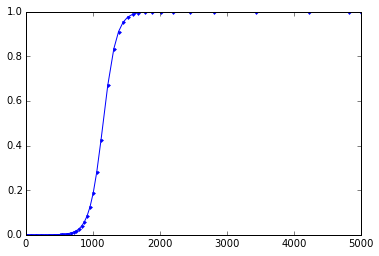

In [2]:
import warnings

def logistic(t, y, r):
    return r * y * (1.0 - y)

r = .01
t0 = 0
y0 = 1e-5
t1 = 5000.0

#backend = 'vode'
backend = 'dopri5'  # ode45 equivalent
#backend = 'dop853'

solver = ode(logistic).set_integrator(backend, nsteps=1)
solver.set_initial_value(y0, t0).set_f_params(r)
# suppress Fortran-printed warning
solver._integrator.iwork[2] = -1

sol = []
warnings.filterwarnings("ignore", category=UserWarning)
while solver.t < t1:
    solver.integrate(t1, step=True)
    sol.append([solver.t, solver.y])
warnings.resetwarnings()
sol = np.array(sol)

plt.plot(sol[:,0], sol[:,1], 'b.-')
plt.show()

# Example Function

$ y' = y^{-1}/2$

$f(t) = RHS$

Answer: $t = y^2$ 

/Users/Thomas/anaconda/lib/python3.5/site-packages/scipy/integrate/_ode.py:1018: UserWarning: dopri5: larger nmax is needed
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


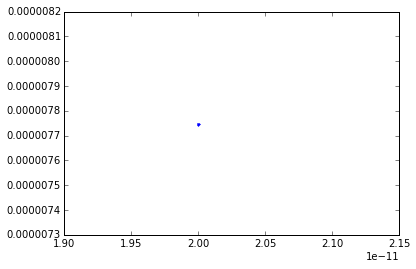

In [3]:
def f(t, y):
    return  -1/y

# Initial params
t0 = 0
y0 = 1e-5

# End Time
t1 = 5000.0

#backend = 'vode'
backend = 'dopri5'  # ode45 equivalent
#backend = 'dop853'

solver = ode(f).set_integrator(backend, nsteps=1)
solver.set_initial_value(y0, t0)

sol = []
while solver.successful() and solver.t < t1:
    solver.integrate(t1)
    sol.append([solver.t, solver.y])
sol = np.array(sol)

plt.plot(sol[:,0], sol[:,1], 'b.-')
plt.show()

In [12]:
h = 6.62607004E-34
def boltzmann(dE,T):
    kB = 1.38064852E-23
    return np.exp(-dE/(kB*T))

dE = h * 3E9
boltzmann(dE,300)


0.99952019067910436